### yahoo finance stock prediction 



In [7]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

stock_data = yf.download("AAPL", start="2020-01-01", end="2024-12-31")
stock_data

C:\Users\maryam\AppData\Local\Temp\ipykernel_22444\1047382999.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download("AAPL", start="2020-01-01", end="2024-12-31")
[*********************100%***********************]  1 of 1 completed



Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-01-02,72.620827,72.681274,71.373203,71.627077,135480400
2020-01-03,71.914810,72.676439,71.689950,71.847110,146322800
2020-01-06,72.487846,72.526533,70.783248,71.034709,118387200
2020-01-07,72.146942,72.753823,71.926915,72.497529,108872000
2020-01-08,73.307518,73.609752,71.849540,71.849540,132079200
...,...,...,...,...,...
2024-12-23,254.655716,255.034791,252.840088,254.156919,40858800
2024-12-24,257.578674,257.588630,254.675658,254.875189,23234700


In [3]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1257 entries, 2020-01-02 to 2024-12-30
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   1257 non-null   float64
 1   (High, AAPL)    1257 non-null   float64
 2   (Low, AAPL)     1257 non-null   float64
 3   (Open, AAPL)    1257 non-null   float64
 4   (Volume, AAPL)  1257 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 58.9 KB


In [9]:
# Flatten MultiIndex columns
stock_data.columns = stock_data.columns.get_level_values(0)
stock_data.reset_index(inplace=True)

columns_to_keep = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']
stock_data = stock_data[columns_to_keep]

stock_data

Price,Date,Close,High,Low,Open,Volume
0,2020-01-02,72.620827,72.681274,71.373203,71.627077,135480400
1,2020-01-03,71.914810,72.676439,71.689950,71.847110,146322800
2,2020-01-06,72.487846,72.526533,70.783248,71.034709,118387200
3,2020-01-07,72.146942,72.753823,71.926915,72.497529,108872000
4,2020-01-08,73.307518,73.609752,71.849540,71.849540,132079200
...,...,...,...,...,...,...
1252,2024-12-23,254.655716,255.034791,252.840088,254.156919,40858800
1253,2024-12-24,257.578674,257.588630,254.675658,254.875189,23234700
1254,2024-12-26,258.396667,259.474086,257.010028,257.568678,27237100
1255,2024-12-27,254.974930,258.077462,252.451019,257.209530,42355300


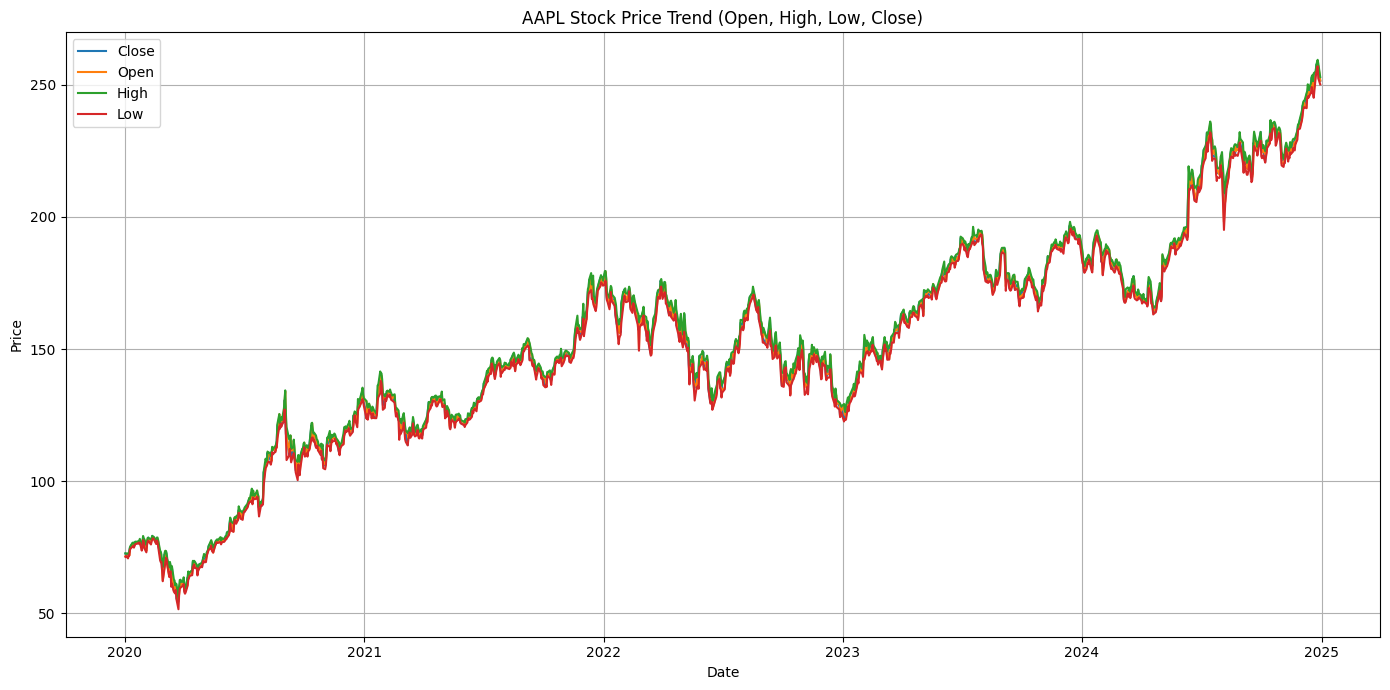

In [10]:

plot_df = stock_data.copy()

plt.figure(figsize=(14, 7))

for col in ['Close', 'Open', 'High', 'Low']:
    sns.lineplot(x='Date', y=col, data=plot_df, label=col)

plt.title('AAPL Stock Price Trend (Open, High, Low, Close)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


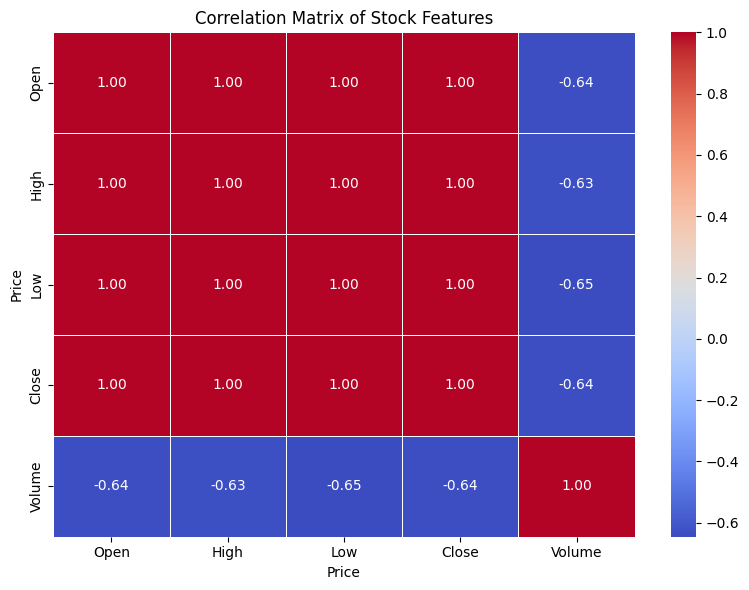

In [11]:
numeric_cols = ['Open', 'High', 'Low', 'Close', 'Volume']
corr_df = stock_data[numeric_cols]

corr_matrix = corr_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Stock Features')
plt.tight_layout()
plt.show()


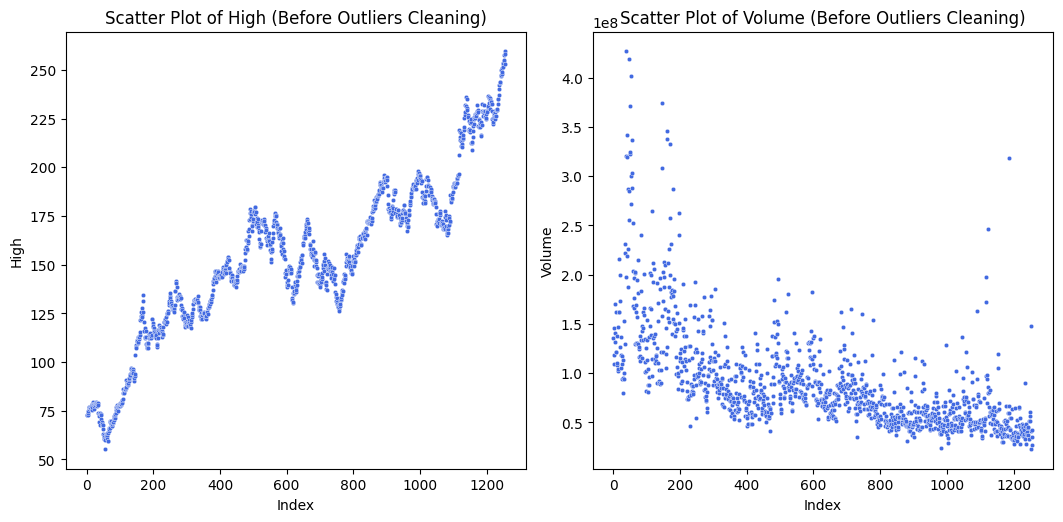

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = ['High', 'Volume']
plt.figure(figsize=(16, 10))

for i, col in enumerate(numeric_cols):
    plt.subplot(2, 3, i+1)
    sns.scatterplot(x=stock_data.index, y=stock_data[col], color='royalblue', s=10)
    plt.title(f'Scatter Plot of {col} (Before Outliers Cleaning)')
    plt.xlabel('Index')
    plt.ylabel(col)

plt.tight_layout()
plt.show()


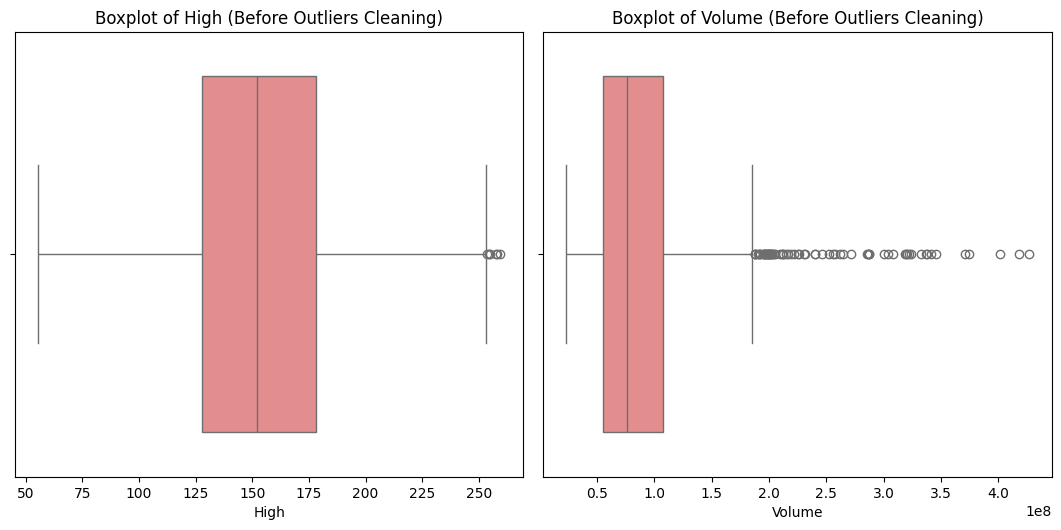

In [13]:
plt.figure(figsize=(16, 10))

for i, col in enumerate(numeric_cols):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x=stock_data[col], color='lightcoral')
    plt.title(f'Boxplot of {col} (Before Outliers Cleaning)')

plt.tight_layout()
plt.show()


In [14]:
import numpy as np
from scipy import stats

cols = ['Open', 'High', 'Low', 'Close', 'Volume']

z_scores = np.abs(stats.zscore(stock_data[cols]))

z_threshold = 3

stock_data_z = stock_data[(z_scores < z_threshold).all(axis=1)]
print(f"Original rows: {len(stock_data)}, After Z-score filtering: {len(stock_data_z)}")


Original rows: 1257, After Z-score filtering: 1229


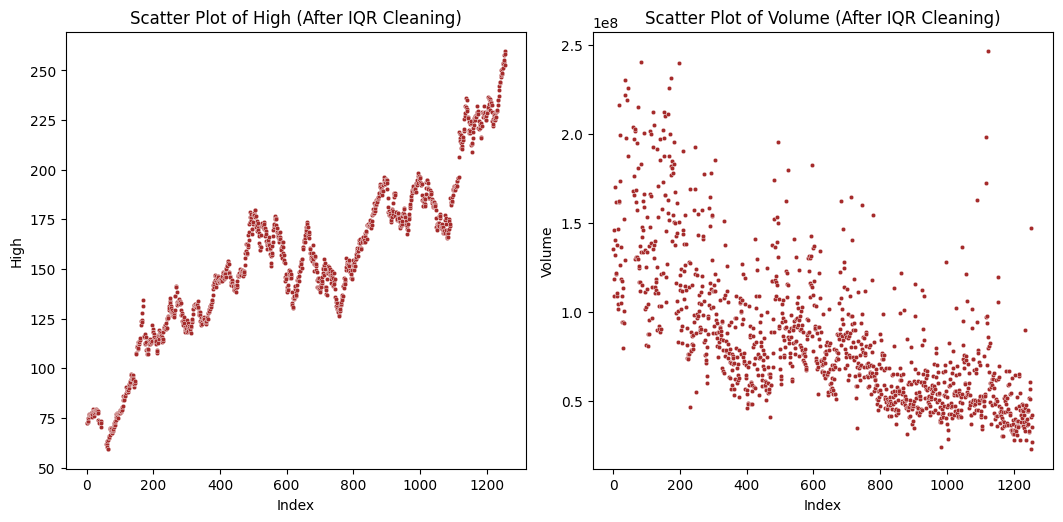

In [15]:
plt.figure(figsize=(16, 10))

for i, col in enumerate(numeric_cols):
    plt.subplot(2, 3, i+1)
    sns.scatterplot(x=stock_data_z.index, y=stock_data_z[col], color='brown', s=10)
    plt.title(f'Scatter Plot of {col} (After IQR Cleaning)')
    plt.xlabel('Index')
    plt.ylabel(col)

plt.tight_layout()
plt.show()


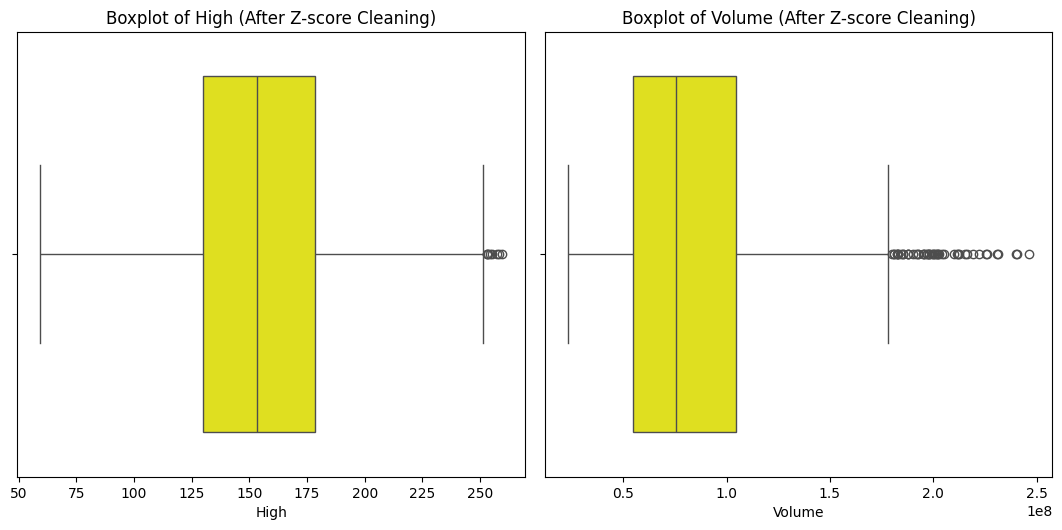

In [16]:
plt.figure(figsize=(16, 10))

for i, col in enumerate(numeric_cols):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x=stock_data_z[col], color='yellow')
    plt.title(f'Boxplot of {col} (After Z-score Cleaning)')

plt.tight_layout()
plt.show()


In [17]:
stock_data_iqr = stock_data.copy()

cols = ['Open', 'High', 'Low', 'Close', 'Volume']

Q1 = stock_data_iqr[cols].quantile(0.25)
Q3 = stock_data_iqr[cols].quantile(0.75)
IQR = Q3 - Q1

filter_iqr = ~((stock_data_iqr[cols] < (Q1 - 1.5 * IQR)) |
               (stock_data_iqr[cols] > (Q3 + 1.5 * IQR))).any(axis=1)

stock_data_iqr = stock_data_iqr[filter_iqr]
print(f"Original rows: {len(stock_data)}, After IQR filtering: {len(stock_data_iqr)}")


Original rows: 1257, After IQR filtering: 1181


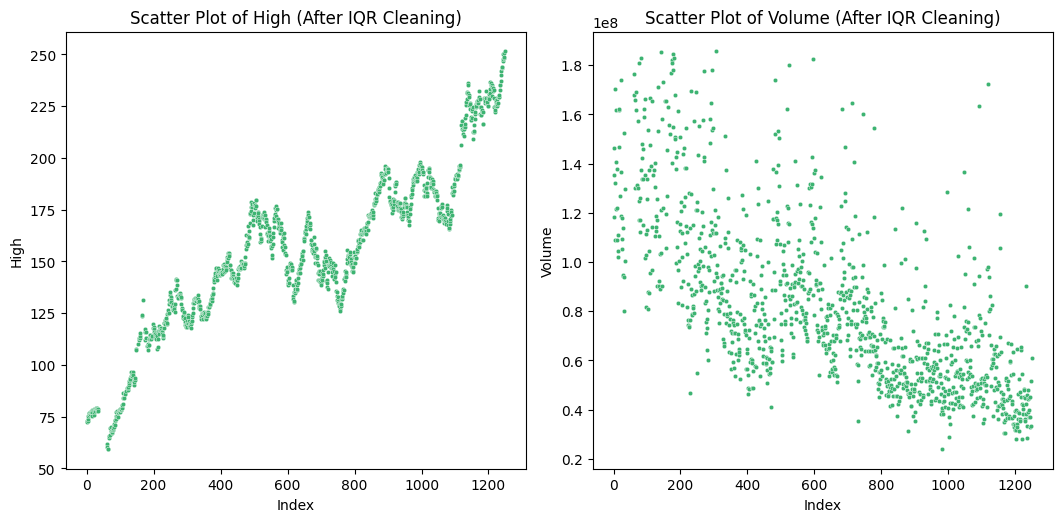

In [18]:
plt.figure(figsize=(16, 10))

for i, col in enumerate(numeric_cols):
    plt.subplot(2, 3, i+1)
    sns.scatterplot(x=stock_data_iqr.index, y=stock_data_iqr[col], color='mediumseagreen', s=10)
    plt.title(f'Scatter Plot of {col} (After IQR Cleaning)')
    plt.xlabel('Index')
    plt.ylabel(col)

plt.tight_layout()
plt.show()


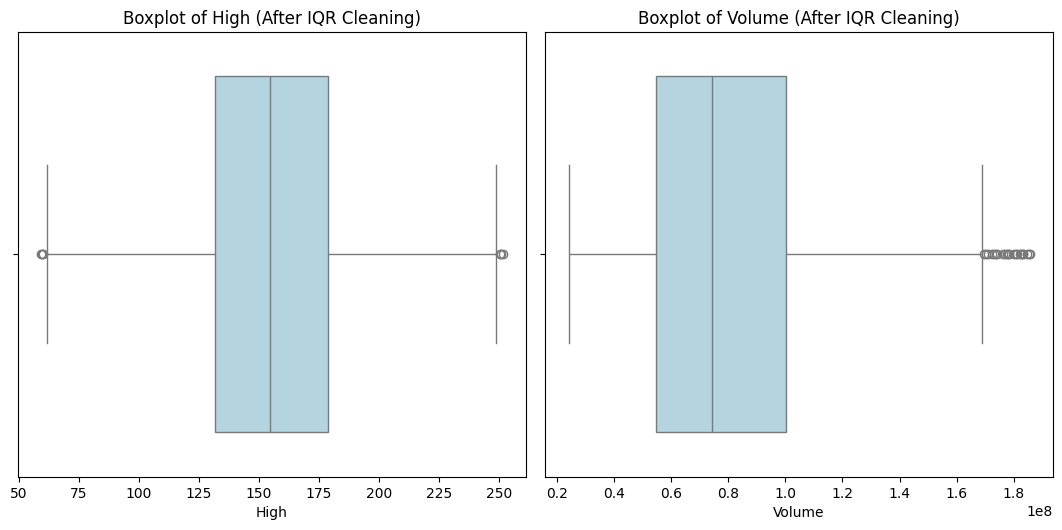

In [19]:
plt.figure(figsize=(16, 10))

for i, col in enumerate(numeric_cols):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x=stock_data_iqr[col], color='lightblue')
    plt.title(f'Boxplot of {col} (After IQR Cleaning)')

plt.tight_layout()
plt.show()


### Normalization & Standardization

In [20]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

data_for_scaling = stock_data_iqr.copy()

dates = data_for_scaling['Date']
features = data_for_scaling[numeric_cols]

# Min-Max Normalization
minmax_scaler = MinMaxScaler()
scaled_minmax = minmax_scaler.fit_transform(features)
df_minmax = pd.DataFrame(scaled_minmax, columns=numeric_cols)
df_minmax['Date'] = dates.values

# Z-Score Standardization
zscore_scaler = StandardScaler()
scaled_zscore = zscore_scaler.fit_transform(features)
df_zscore = pd.DataFrame(scaled_zscore, columns=numeric_cols)
df_zscore['Date'] = dates.values


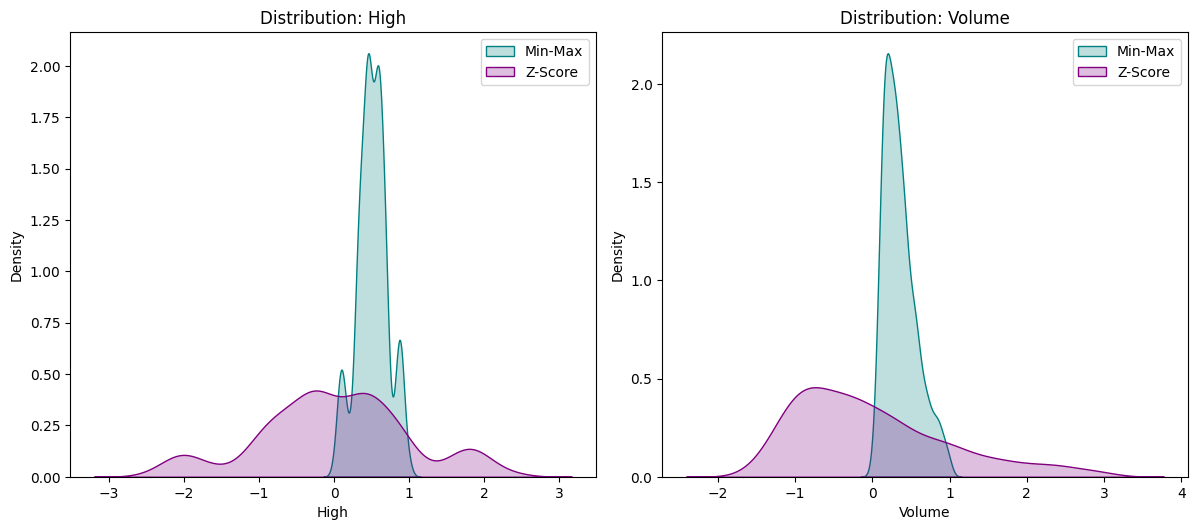

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 10))

for i, col in enumerate(numeric_cols):
    plt.subplot(2, 3, i+1)
    sns.kdeplot(df_minmax[col], label='Min-Max', fill=True, color='teal')
    sns.kdeplot(df_zscore[col], label='Z-Score', fill=True, color='purple')
    plt.title(f'Distribution: {col}')
    plt.legend()

plt.tight_layout()
plt.show()
